## WSGI vs werkzeug vs flask vs ngnx

Here’s a **clear, layered explanation** of **WSGI vs Werkzeug vs Flask vs Nginx**, from lowest level to highest. This is a very common point of confusion 👍

---

## Big picture (stack view)

```
Client (Browser / API Client)
        ↓ HTTP
Nginx (Web Server / Reverse Proxy)
        ↓ WSGI
Gunicorn / uWSGI (App Server)
        ↓
Flask (Web Framework)
        ↓
Werkzeug (WSGI + HTTP utilities)
        ↓
Your Python code
```

---

## 1️⃣ WSGI — *the standard*

**WSGI (Web Server Gateway Interface)** is **not software**, it’s a **specification**.

### What it does

* Defines **how** a web server talks to a Python app
* Ensures compatibility between servers and frameworks

### Key idea

> “If both sides follow WSGI, they can work together.”

### Example

* Flask app ✔️
* Gunicorn server ✔️
  → They communicate via **WSGI**

---

## 2️⃣ Werkzeug — *the toolkit*

**Werkzeug** is a **Python library** that implements WSGI utilities.

### What it does

* Request & response objects
* URL routing
* WSGI helpers
* Debugger
* Security utilities

### Role

> “Werkzeug helps Python apps correctly speak HTTP and WSGI.”

### Important

* Flask **uses Werkzeug internally**
* Most devs never import Werkzeug directly

---

## 3️⃣ Flask — *the framework*

**Flask** is a **web framework**.

### What it does

* Routing (`@app.route`)
* Views / controllers
* Middleware
* Extensions
* App configuration

### Built on

* **Werkzeug** → request/response, WSGI
* **Jinja2** → templates

### Role

> “Flask lets you build web apps without worrying about low-level HTTP.”

---

## 4️⃣ Nginx — *the web server*

**Nginx** is a **high-performance web server & reverse proxy**.

### What it does

* Handles HTTP connections
* Serves static files (CSS, JS, images)
* Load balances
* SSL/TLS termination
* Forwards requests to app servers

### Important

❌ Nginx **does NOT run Python**
✅ It forwards requests to Gunicorn/uWSGI

---

## Comparison table

| Component    | What it is     | Runs Python? | Purpose                  |
| ------------ | -------------- | ------------ | ------------------------ |
| **WSGI**     | Specification  | ❌            | Communication standard   |
| **Werkzeug** | Python library | ✅            | HTTP + WSGI utilities    |
| **Flask**    | Web framework  | ✅            | Build web apps           |
| **Nginx**    | Web server     | ❌            | Front-facing HTTP server |

---

## Typical production setup

```text
User → Nginx → Gunicorn → Flask → Werkzeug → App code
```

### Why this setup?

* Nginx: fast, secure, handles load
* Gunicorn: runs Python workers
* Flask: app logic
* Werkzeug: low-level request handling

---

## Analogy (easy to remember)

* **WSGI** → Rules of the road
* **Werkzeug** → Engine parts
* **Flask** → Car
* **Nginx** → Highway system

---

## Key takeaways

* WSGI = **standard**
* Werkzeug = **implementation/toolkit**
* Flask = **framework**
* Nginx = **web server / reverse proxy**

---

If you want, I can:

* Show a **minimal WSGI app**
* Explain **Gunicorn vs uWSGI**
* Compare **Flask vs FastAPI (ASGI)**
* Show a **Docker setup** for this stack

Just say the word 🚀


This slide lists **Flask’s built-in dependencies** and what role each one plays. I’ll explain each **clearly and correctly**, and also fix a **common misconception** on the slide.

---

## Flask built-in dependencies (explained)

Flask is **small by design**, so it relies on a few focused libraries instead of reinventing everything.

---

### 1️⃣ Werkzeug — *WSGI & HTTP utilities*

**What it really does**

* Handles **WSGI**
* Parses HTTP requests
* Builds HTTP responses
* Provides routing and debugging tools

⚠️ The slide says *“Implements server”*
That’s **partially misleading**.

✅ Werkzeug provides a **development server**
❌ It is **not a production web server**

In production you still use:

* Gunicorn
* uWSGI
* Waitress

**Think of Werkzeug as:**

> The engine that lets Flask speak HTTP & WSGI correctly

---

### 2️⃣ Jinja — *Template engine*

**What it does**

* Renders HTML templates
* Supports variables, loops, conditionals

Example:

```html
<h1>Hello {{ user.name }}</h1>
```

Flask uses Jinja to generate HTML responses dynamically.

---

### 3️⃣ MarkupSafe — *Template security*

**What it does**

* Prevents **XSS (Cross-Site Scripting)** attacks
* Escapes unsafe HTML automatically

Example:

```python
{{ user_input }}
```

If `user_input` contains `<script>`, MarkupSafe ensures it’s escaped.

**Used internally by Jinja**
You rarely import it yourself.

---

### 4️⃣ ItsDangerous — *Secure signing*

**What it does**

* Cryptographically signs data
* Prevents tampering

Flask uses it for:

* **Session cookies**
* Token signing

Example concept:

```text
data + secret_key → signed → safe to store in browser
```

If someone modifies the cookie → Flask detects it.

---

### 5️⃣ Click — *Command Line Interface (CLI)*

**What it does**

* Builds CLI commands like:

```bash
flask run
flask shell
flask db migrate
```

Click makes Flask’s command-line experience clean and powerful.

---

## How these fit together

```
Flask
 ├── Werkzeug  → HTTP + WSGI
 ├── Jinja     → HTML templates
 │     └── MarkupSafe → Security
 ├── ItsDangerous → Secure cookies
 └── Click     → CLI commands
```

---

## One-line summary (exam-friendly)

* **Werkzeug**: HTTP & WSGI utilities
* **Jinja**: Template engine
* **MarkupSafe**: Template security
* **ItsDangerous**: Secure signing
* **Click**: Command-line tools

---

## Key takeaway

> **Flask is a thin layer that glues together powerful libraries**, each doing one job very well.

If you want next:

* 🔍 *How a Flask request flows through Werkzeug*
* ⚔️ *Flask vs FastAPI dependency comparison*
* 🧠 *Why Flask stayed WSGI instead of ASGI*

Just tell me 👌


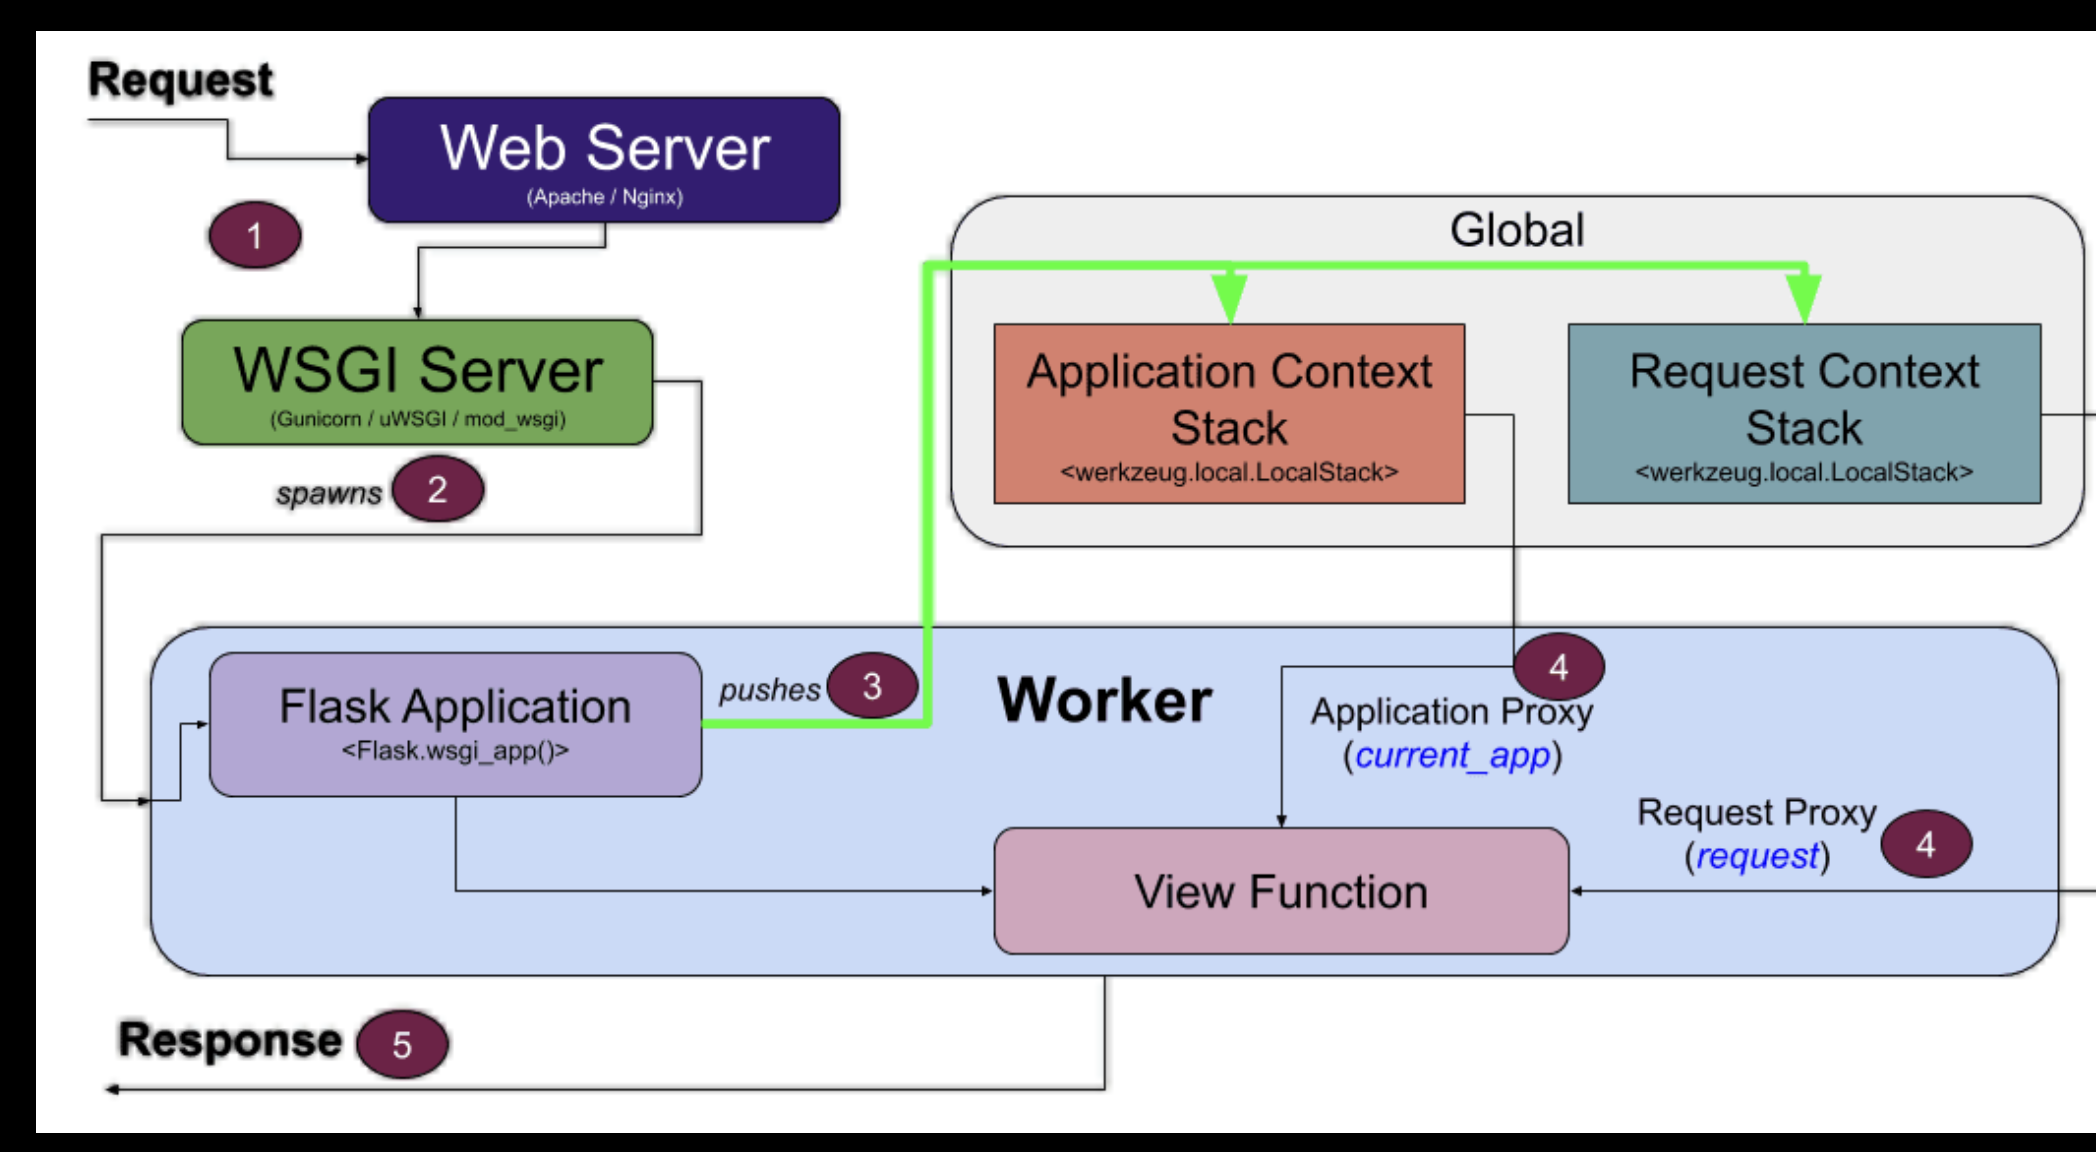


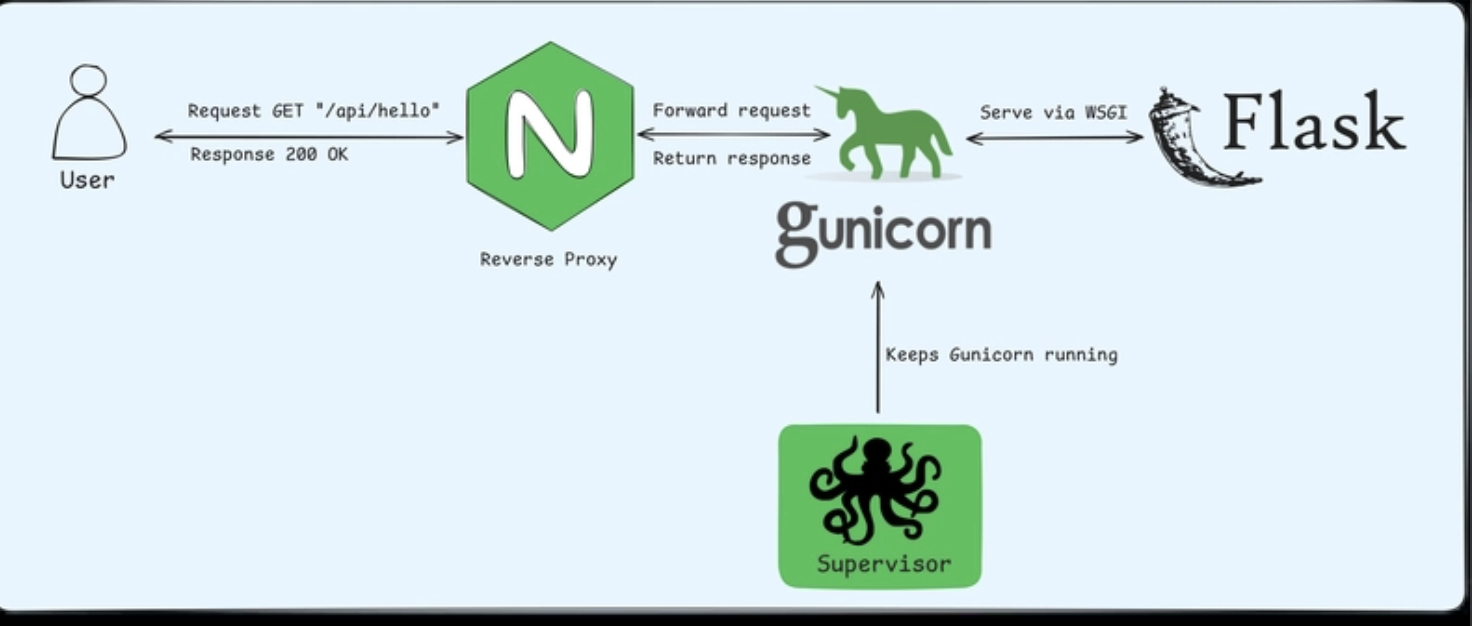